<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [12]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


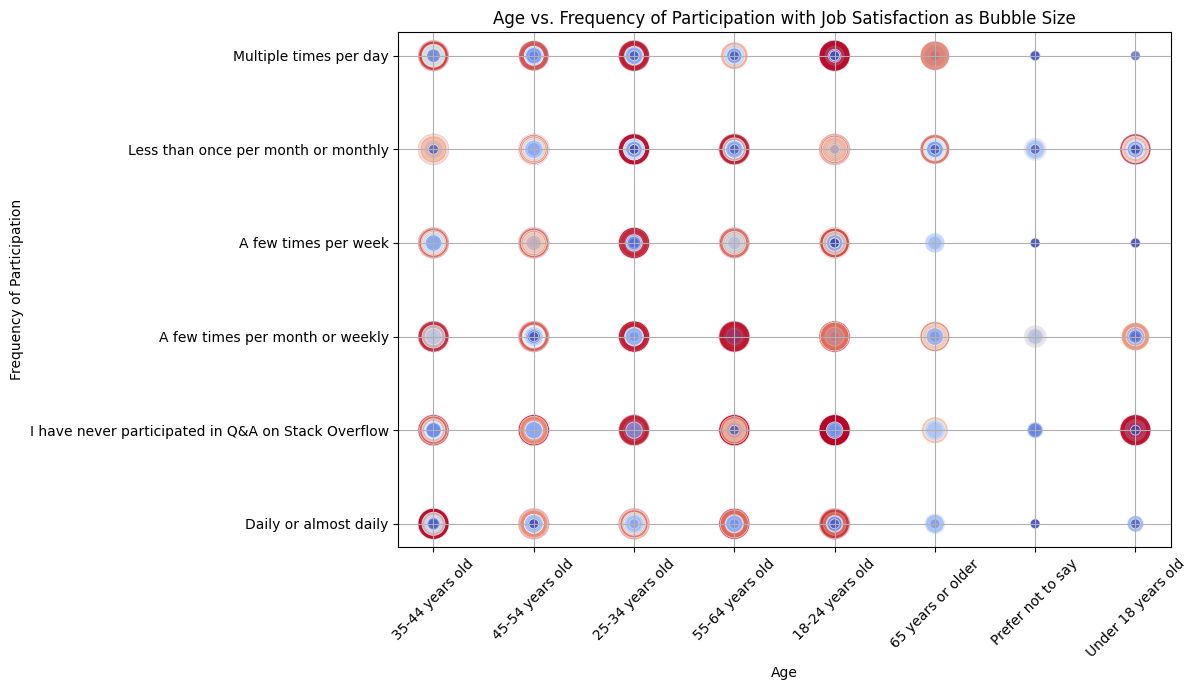

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in relevant columns
df = df[['Age', 'SOPartFreq', 'JobSatPoints_6']].dropna()

# Normalize JobSatPoints_6 to control bubble size (optional)
df['BubbleSize'] = df['JobSatPoints_6'] * 50  # Scale job satisfaction to appropriate bubble size

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Age',
    y='SOPartFreq',
    size='BubbleSize',  # Bubble size will represent JobSatPoints_6
    sizes=(50, 500),  # Adjust size range to your preference
    hue='JobSatPoints_6',  # Color based on job satisfaction
    palette='coolwarm',
    alpha=0.7,
    legend=False
)

# Add titles and labels
plt.title('Age vs. Frequency of Participation with Job Satisfaction as Bubble Size')
plt.xlabel('Age')
plt.ylabel('Frequency of Participation')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


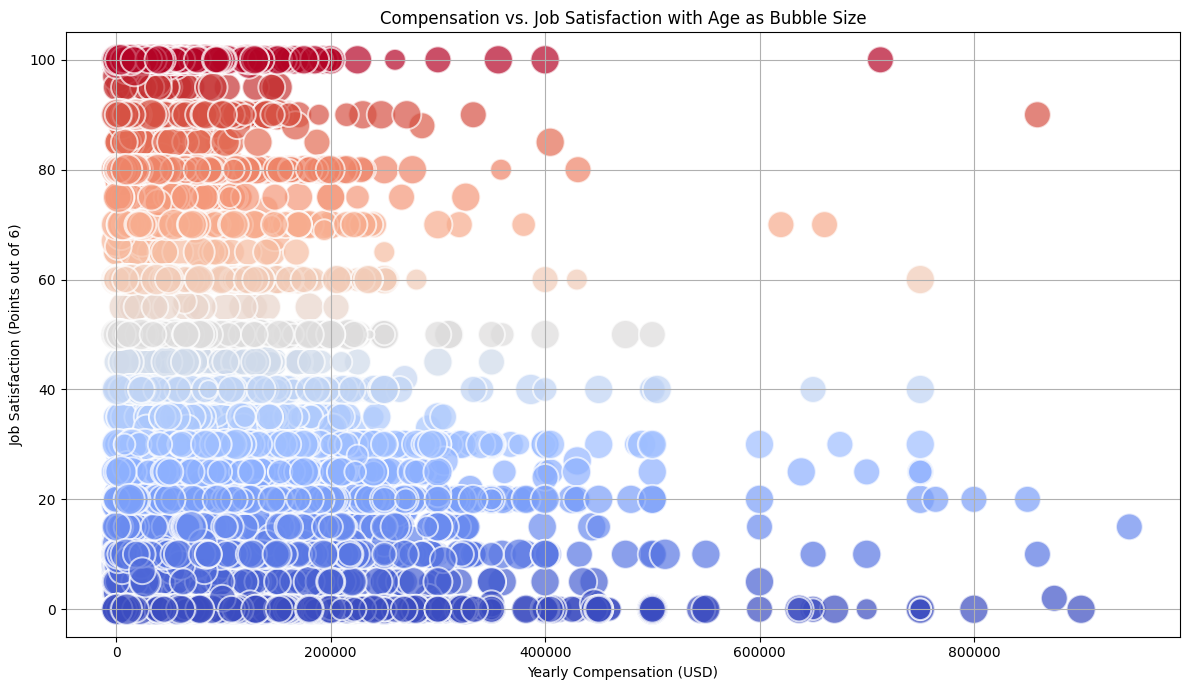

In [9]:
df = pd.read_csv("survey-data.csv")
# Drop rows with missing values in relevant columns
df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()

# Normalize Age to control bubble size (optional)
df['BubbleSize'] = df['Age'] * 10  # Scale age to appropriate bubble size
df = df[df['ConvertedCompYearly'] < 1e6] 
# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='BubbleSize',  # Bubble size will represent Age
    sizes=(50, 500),  # Adjust size range to your preference
    hue='JobSatPoints_6',  # Color based on Job Satisfaction
    palette='coolwarm',
    alpha=0.7,
    legend=False
)

# Add titles and labels
plt.title('Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [ ]:
df = pd.read_csv("survey-data.csv")

# Filter and clean the data (Assuming 'LanguageHaveWorkedWith' is a column with comma-separated languages)
df = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Exploding the 'LanguageHaveWorkedWith' column to have one row per language per respondent
df_expanded = df.dropna(subset=['LanguageHaveWorkedWith']).copy()
df_expanded['LanguageHaveWorkedWith'] = df_expanded['LanguageHaveWorkedWith'].str.split(',')
df_expanded = df_expanded.explode('LanguageHaveWorkedWith')

# Count the frequency of each language by age group
language_counts = df_expanded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=language_counts,
    x='Age',
    y='LanguageHaveWorkedWith',
    size='Frequency',  # Bubble size based on the frequency of the language
    sizes=(50, 1000),  # Adjust the size range for the bubbles
    hue='Frequency',  # Optional: Color based on frequency
    palette='viridis',
    alpha=0.6,
    legend=False
)

# Add titles and labels
plt.title('Technology Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [ ]:
# Load the dataset
df = pd.read_csv("survey-data.csv")

# Filter out rows with missing values in relevant columns
df = df[['JobSatPoints_6', 'DatabaseWantToWorkWith']].dropna()

# Exploding the 'DatabaseWantToWorkWith' column to have one row per database per respondent
df_expanded = df.dropna(subset=['DatabaseWantToWorkWith']).copy()
df_expanded['DatabaseWantToWorkWith'] = df_expanded['DatabaseWantToWorkWith'].str.split(',')
df_expanded = df_expanded.explode('DatabaseWantToWorkWith')

# Count the frequency of each database by job satisfaction
db_counts = df_expanded.groupby(['JobSatPoints_6', 'DatabaseWantToWorkWith']).size().reset_index(name='Frequency')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=db_counts,
    x='DatabaseWantToWorkWith',
    y='JobSatPoints_6',
    size='Frequency',  # Bubble size based on frequency of database preference
    sizes=(50, 1000),  # Adjust size range to your preference
    hue='Frequency',  # Optional: Color based on frequency
    palette='viridis',
    alpha=0.6,
    legend=False
)

# Add titles and labels
plt.title('Preferred Databases vs. Job Satisfaction')
plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Filter out rows with missing values in relevant columns
df = df[['DevType', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Calculate bubble size (optional: normalize job satisfaction to control bubble size)
df['BubbleSize'] = df['JobSatPoints_6'] * 100  # Scale job satisfaction to appropriate bubble size

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='DevType',
    y='ConvertedCompYearly',
    size='BubbleSize',  # Bubble size based on job satisfaction
    sizes=(50, 1000),  # Adjust size range to your preference
    hue='JobSatPoints_6',  # Optional: Color based on job satisfaction
    palette='coolwarm',
    alpha=0.7,
    legend=False
)

# Add titles and labels
plt.title('Compensation Across Developer Roles with Job Satisfaction as Bubble Size')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [ ]:
# Load the dataset
df = pd.read_csv("survey-data.csv")

# Filter out rows with missing values in relevant columns
df = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Create age groups (optional: categorize age into bins)
bins = [0, 20, 30, 40, 50, 60, 100]  # Define age groups
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Exploding the 'NEWCollabToolsHaveWorkedWith' column to have one row per tool per respondent
df_expanded = df.dropna(subset=['NEWCollabToolsHaveWorkedWith']).copy()
df_expanded['NEWCollabToolsHaveWorkedWith'] = df_expanded['NEWCollabToolsHaveWorkedWith'].str.split(',')
df_expanded = df_expanded.explode('NEWCollabToolsHaveWorkedWith')

# Count the frequency of each tool by age group
tool_counts = df_expanded.groupby(['AgeGroup', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=tool_counts,
    x='NEWCollabToolsHaveWorkedWith',
    y='AgeGroup',
    size='Frequency',  # Bubble size based on frequency of tool usage
    sizes=(50, 1000),  # Adjust size range to your preference
    hue='Frequency',  # Optional: Color based on frequency
    palette='viridis',
    alpha=0.6,
    legend=False
)

# Add titles and labels
plt.title('Collaboration Tools Used by Age Group with Frequency as Bubble Size')
plt.xlabel('Collaboration Tools')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in relevant columns
df = df[['WebframeWantToWorkWith', 'JobSatPoints_6']].dropna()

# Exploding the 'WebframeWantToWorkWith' column to have one row per framework per respondent
df_expanded = df.dropna(subset=['WebframeWantToWorkWith']).copy()
df_expanded['WebframeWantToWorkWith'] = df_expanded['WebframeWantToWorkWith'].str.split(',')
df_expanded = df_expanded.explode('WebframeWantToWorkWith')

# Count the frequency of each web framework per job satisfaction level
framework_counts = df_expanded.groupby(['JobSatPoints_6', 'WebframeWantToWorkWith']).size().reset_index(name='Frequency')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=framework_counts,
    x='WebframeWantToWorkWith',
    y='JobSatPoints_6',
    size='Frequency',  # Bubble size based on frequency of respondents
    sizes=(50, 1000),  # Adjust size range to your preference
    hue='Frequency',  # Optional: Color based on frequency of respondents
    palette='viridis',
    alpha=0.6,
    legend=False
)

# Add titles and labels
plt.title('Preferred Web Frameworks vs. Job Satisfaction with Frequency as Bubble Size')
plt.xlabel('Preferred Web Frameworks')
plt.ylabel('Job Satisfaction (Points out of 6)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in relevant columns
df = df[['LanguageAdmired', 'Country']].dropna()

# Exploding the 'LanguageAdmired' column to have one row per technology per respondent
df_expanded = df.dropna(subset=['LanguageAdmired']).copy()
df_expanded['LanguageAdmired'] = df_expanded['LanguageAdmired'].str.split(',')
df_expanded = df_expanded.explode('LanguageAdmired')

# Count the frequency of admiration per country for each technology
admired_counts = df_expanded.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Frequency')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=admired_counts,
    x='Country',
    y='LanguageAdmired',
    size='Frequency',  # Bubble size based on frequency of admiration
    sizes=(50, 1000),  # Adjust size range to your preference
    hue='Frequency',  # Optional: Color based on frequency of admiration
    palette='viridis',
    alpha=0.7,
    legend=False
)

# Add titles and labels
plt.title('Admired Technologies Across Countries with Frequency as Bubble Size')
plt.xlabel('Country')
plt.ylabel('Admired Technologies')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
